# PCA on wine quality data
We like this data, because it is all numeric data.
It looks like this

```
"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;9.8;5
```

Check data in *datasets/wine-quality*
- winequality-red.csv
- winequality-white.csv

In [19]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import time
import numpy as np
import pandas as pd


## Step 1 : Load Data

In [20]:
## read data
data_file= '/data/wine-quality/winequality-red.csv'
#data_file= '/data/wine-quality/winequality-white.csv'
column_to_remove = 'quality'

data = pd.read_csv(data_file, sep=";")
data = data.dropna()


## Step 2 : Basic data analysis

In [21]:

data2 = data.drop(column_to_remove, axis=1)

print("original data columns  ", len(data.columns))

features = list(data2)
print("features: " + str(features))
data2

original data columns   12
features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5


In [22]:
## basic data analytics
data2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


## Step 3 : Create feature vector

In [23]:
feature_v = data2
feature_v

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5


## Step 4 : Correlation Matrix of original data
Do see any correlation?

In [24]:
feature_v.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


## Step 5 : Scale Data
We need to scale data before PCA

In [25]:
feature_v = (feature_v - feature_v.mean()) / feature_v.std()
feature_v

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946
5,-0.528194,0.738187,-1.391037,-0.524002,-0.264878,-0.274845,-0.196617,0.558100,1.288240,-0.579025,-0.959946
6,-0.241019,0.403103,-1.083031,-0.665853,-0.392360,-0.083643,0.380972,-0.183687,-0.071983,-1.168972,-0.959946
7,-0.585629,0.682339,-1.391037,-0.949556,-0.477348,-0.083643,-0.774207,-1.137414,0.510970,-1.109977,-0.396918
8,-0.298454,0.291408,-1.288368,-0.382151,-0.307372,-0.657248,-0.865405,0.028252,0.316652,-0.520031,-0.866108
9,-0.470759,-0.155370,0.457001,2.525799,-0.349866,0.107558,1.688149,0.558100,0.251880,0.836846,0.072271


## Step 6 : Do PCA

In [26]:
# numver of principal components 
num_pc = 5

from sklearn.decomposition import PCA

pca = PCA(n_components = num_pc)
pca.fit(feature_v)
transformed_v = pca.transform(feature_v)
transformed_v_df = pd.DataFrame(transformed_v, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
transformed_v_df

,PC1,PC2,PC3,PC4,PC5
0,-1.619023,0.450809,-1.773899,0.043727,0.066994
1,-0.798920,1.855972,-0.911405,0.547895,-0.018386
2,-0.748245,0.881763,-1.171028,0.410892,-0.043517
3,2.356935,-0.269892,0.243413,-0.928160,-1.498680
4,-1.619023,0.450809,-1.773899,0.043727,0.066994
5,-1.583212,0.569017,-1.537805,0.023742,-0.110042
6,-1.101120,0.607825,-1.075578,-0.343852,-1.133028
7,-2.248004,-0.416704,-0.986529,-0.001203,-0.780191
8,-1.086547,-0.308473,-1.517675,0.003314,-0.226656
9,0.654585,1.664687,1.209098,-0.824377,1.717963


## Step 7 : Correlation Matrix for Principal Components
These should be very small (close to zero!)

In [27]:
transformed_v_df.corr().round(3)

,PC1,PC2,PC3,PC4,PC5
PC1,1.0,0.0,-0.0,0.0,-0.0
PC2,0.0,1.0,-0.0,0.0,-0.0
PC3,-0.0,-0.0,1.0,-0.0,-0.0
PC4,0.0,0.0,-0.0,1.0,-0.0
PC5,-0.0,-0.0,-0.0,-0.0,1.0


## Step 8 : Calculate PC Variance

We started with 5 PCs.  
How much coverage (variance) are we getting?

Play with **num_pc** in Step-6 to get 90% coverage


In [28]:
## variance
variance = pca.explained_variance_ratio_
print(variance)
print ("Original data had {} features,  principal components {}".format(len(data2.columns), num_pc))
print("Cumulative Explained Variance: " + str(np.cumsum(variance)[-1]))

[0.28173931 0.1750827  0.1409585  0.11029387 0.08720837]
Original data had 11 features,  principal components 5
Cumulative Explained Variance: 0.795282747361035


## Step 9 : Screeplot
Screeplot goes from 0.0  to 1.0

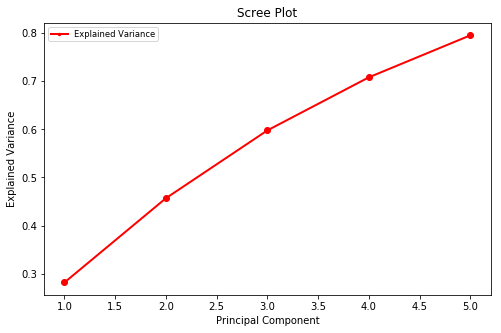

In [29]:
fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(num_pc) + 1
plt.plot(np.arange(num_pc) + 1, np.cumsum(variance), 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')


leg = plt.legend(['Explained Variance'], loc='best', borderpad=0.3, 
                 shadow=False, prop=matplotlib.font_manager.FontProperties(size='small'),
                 markerscale=0.4)

In [30]:

for x in range(0,5):
    # Let's get the top components of PC1:
    print("top components of PC" + str(x+1) + ":")
    rel_values = np.abs(pca.components_[x])/np.sum(np.abs(pca.components_[x]))
    print("Feature Names: " + str([features[i] for i in np.argsort(-rel_values)[:3]]))
    print("Percentages: " + str(rel_values[np.argsort(-rel_values)[:3]]))

top components of PC1:
Feature Names: ['fixed acidity', 'citric acid', 'pH']
Percentages: [0.1747774  0.16560389 0.15663416]
top components of PC2:
Feature Names: ['total sulfur dioxide', 'free sulfur dioxide', 'alcohol']
Percentages: [0.2105755  0.18989827 0.14279563]
top components of PC3:
Feature Names: ['alcohol', 'volatile acidity', 'free sulfur dioxide']
Percentages: [0.16238591 0.15491143 0.14762322]
top components of PC4:
Feature Names: ['chlorides', 'sulphates', 'residual sugar']
Percentages: [0.28271254 0.23377327 0.15820169]
top components of PC5:
Feature Names: ['residual sugar', 'alcohol', 'pH']
Percentages: [0.26902899 0.12885912 0.09830475]


### Biplot

Let's reduce dimensions down to 2 dimensions, and then we can do our biplot.  A biplot plots 2 PCA'ed dimensions, and then also projects the original feature vector onto those two axes.  This helps us see and visualize how the principal components are related to the original features.

In [31]:

def biplot(score,coeff,y,labels=None):
    plt.rcParams['figure.figsize'] = [15, 10]
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-0.6,0.8)
    plt.ylim(-0.6,0.8)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

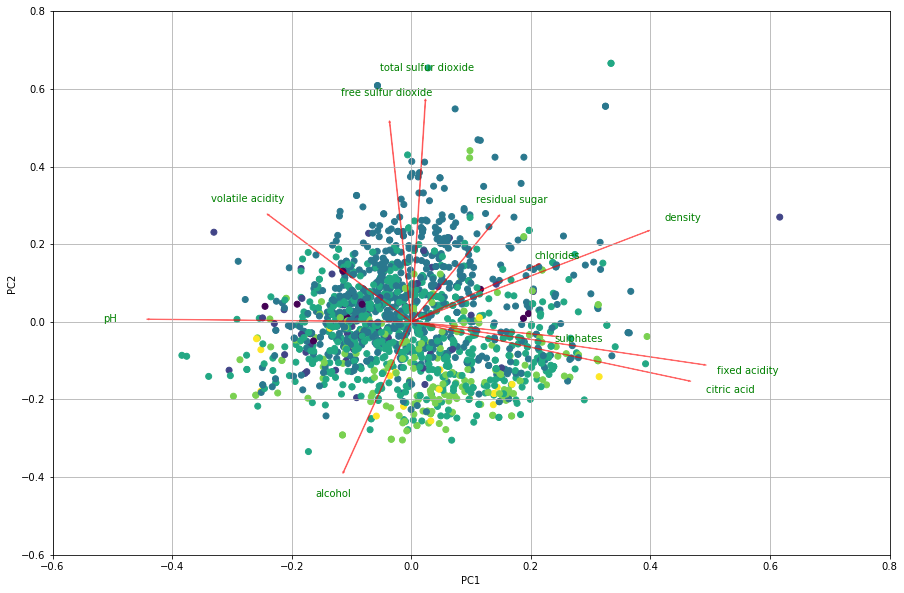

In [32]:
pca_2d = PCA()
x_new = pca_2d.fit_transform(feature_v)


# Let's do a biplot of a PCA = 2 dimensions
biplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]),data['quality'],labels=features)
